<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW/Ch3_%EC%98%88%EC%A0%9C_11_Logistic_Regression_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter3-3. Deep Learning 기초 : Logistic Regression

>## [예제3-11] Logistic Regression (TensorFlow)

>### Load modules

In [2]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.1


> ### Input and Label

In [0]:
# Logistic regression : Binary Classification data
x_input = np.array([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]])
labels = np.array([[0], [0], [0], [1], [1], [1]])

> ### Placeholder

In [0]:
# placeholder
x_ph = tf.placeholder(tf.float32, (None, 2), name="input")
labels_ph = tf.placeholder(tf.float32, (None, 1), name="target")

>### Activation Function : Sigmoid Function
>$\sigma(x) = \frac{1}{1+e^{-x}}$
>### Hypothesis : Logistic Equation
>### $H(x) = \sigma(XW + b$)

In [0]:
# Weight, Bias
w = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32, name="weight")
b = tf.Variable(tf.random.normal((1, 1)), dtype=tf.float32, name="bias")

hypothesis = tf.sigmoid(tf.matmul(x_ph ,w) + b)

>### Cost Function : Cross Entropy Error
>### $cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}t\log{H(x_{i}})+(1-t)\log{(1-H(x_{i}}))$

In [0]:
cost = -tf.reduce_mean(labels_ph * tf.log(hypothesis) + (1 - labels_ph) * tf.log(1 - hypothesis))

>### Optimizer : tf.train.GradientDescentOptimizer (Gradient Descent Optimizer)

In [0]:
learning_rate = 0.01

optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

>### 학습 준비 과정

In [0]:
N_training = 100000
training_idx = np.arange(0, N_training+1, 1)
cost_graph = np.zeros(N_training+1)
check = np.array([0, 1000, 8000, 20000, 40000, N_training])
w_trained = []
b_trained = []
check_idx = 0

### 학습 (Training)

In [13]:
%%time
# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())
for cnt_training in range(1, N_training+1):
    _, cost_res, w_res, b_res = sess.run((train, cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
    cost_graph[cnt_training-1] = cost_res
    if check[check_idx] == cnt_training-1:
        w_trained.append(w_res)
        b_trained.append(b_res)
        check_idx += 1
    if cnt_training % 1000 == 1:
        print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(cnt_training-1, cost_graph[cnt_training-1], w_res[0][0], w_res[1][0], b_res[0][0]))

cost_res, w_res, b_res = sess.run((cost, w, b), feed_dict={x_ph: x_input, labels_ph: labels})
cost_graph[cnt_training-1] = cost_res
w_trained.append(w_res)
b_trained.append(b_res)
print("[{:>5}] cost = {:>10.4}, w = [[{:>7.4}] [{:>7.4}]], b = [[{:>7.4}]]".format(N_training, cost_graph[N_training], w_res[0][0], w_res[1][0], b_res[0][0]))


[    0] cost =      0.945, w = [[-0.004546] [-0.3537]], b = [[-0.3654]]
[ 1000] cost =     0.5117, w = [[ 0.3933] [ 0.4767]], b = [[ -1.216]]
[ 2000] cost =     0.4257, w = [[ 0.5987] [  0.716]], b = [[ -2.088]]
[ 3000] cost =     0.3628, w = [[  0.777] [ 0.9187]], b = [[ -2.832]]
[ 4000] cost =     0.3156, w = [[  0.932] [  1.095]], b = [[ -3.478]]
[ 5000] cost =      0.279, w = [[  1.068] [  1.249]], b = [[ -4.046]]
[ 6000] cost =     0.2499, w = [[   1.19] [  1.387]], b = [[ -4.553]]
[ 7000] cost =     0.2262, w = [[    1.3] [  1.511]], b = [[  -5.01]]
[ 8000] cost =     0.2066, w = [[    1.4] [  1.625]], b = [[ -5.426]]
[ 9000] cost =     0.1901, w = [[  1.491] [  1.728]], b = [[ -5.807]]
[10000] cost =     0.1761, w = [[  1.576] [  1.824]], b = [[  -6.16]]
[11000] cost =     0.1639, w = [[  1.655] [  1.913]], b = [[ -6.488]]
[12000] cost =     0.1533, w = [[  1.728] [  1.996]], b = [[ -6.793]]
[13000] cost =      0.144, w = [[  1.797] [  2.074]], b = [[  -7.08]]
[14000] cost =    

>### Hypothesis Test 

In [14]:
# Training 상황에 대한 그래프 출력
print("[Training Test]")
y = sess.run(hypothesis, feed_dict={x_ph:x_input})
y = y.reshape((-1,))
Y = [int(y_elem>0.5) for y_elem in y]
for idx in range(x_input.shape[0]):
    print("Input {} , Target : {} => Y :{:>2}(y:{:>5.2})".format(x_input[idx], labels[idx], Y[idx], y[idx]))

[Training Test]
Input [1. 1.] , Target : [0] => Y : 0(y:0.00066)
Input [2. 1.] , Target : [0] => Y : 0(y:0.029)
Input [1. 2.] , Target : [0] => Y : 0(y:0.049)
Input [0.5 4. ] , Target : [1] => Y : 1(y: 0.98)
Input [4. 1.] , Target : [1] => Y : 1(y: 0.98)
Input [2.5 2.3] , Target : [1] => Y : 1(y: 0.98)


>### Plotting

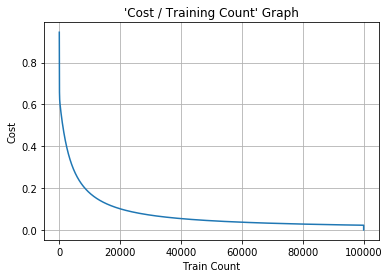

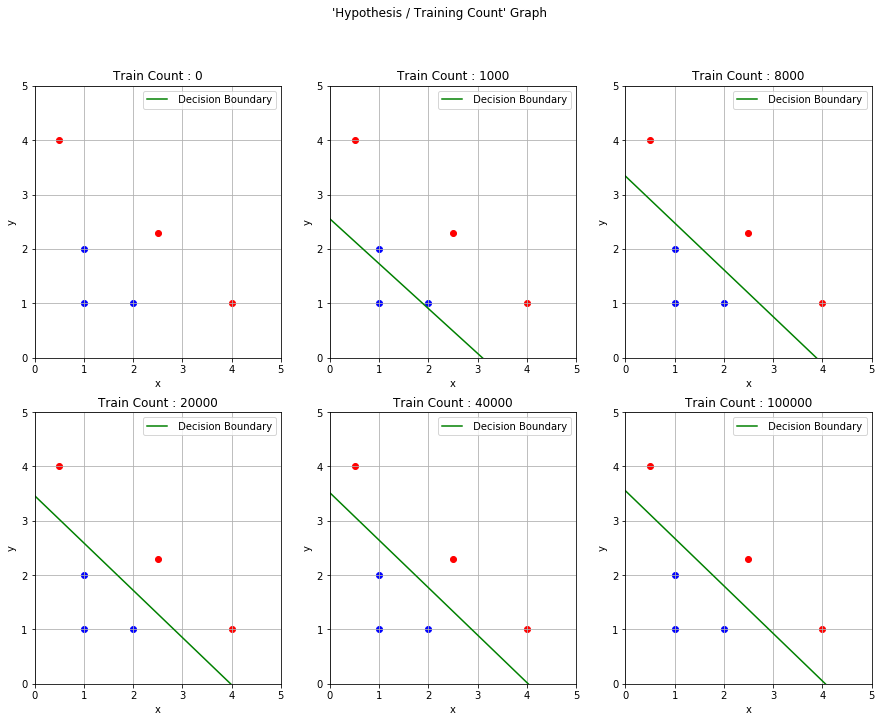

In [15]:
# Training 상황에 대한 그래프 출력
# 1)Training 회수 별 Cost 값
fig_cost, ax_cost = plt.subplots()
ax_cost.plot(training_idx, cost_graph)
ax_cost.set_title("'Cost / Training Count' Graph")
ax_cost.set_xlabel("Train Count")
ax_cost.set_ylabel("Cost")
ax_cost.grid(True)


# 2) 구분선 그려넣을 계획
x_decision = np.linspace(0, 5, 1000)
x_col = x_input[:, 0]
x_row = x_input[:, 1]
fig_hypothesis, ax_hypothesis = plt.subplots(2, 3, figsize=(15, 11))
fig_hypothesis.suptitle("'Hypothesis / Training Count' Graph")
for ax_idx in range(check.size):
    w = w_trained[ax_idx]
    b = b_trained[ax_idx]
    y_decision = -(w[0][0] * x_decision + b[0][0])/w[1][0] 
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[:3], x_row[:3], color='blue')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].scatter(x_col[3:], x_row[3:], color='red')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].plot(x_decision, y_decision, label=' Decision Boundary', color='green')
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_title("Train Count : {}".format(check[ax_idx]))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylim((0, 5))
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_xlabel("x")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].set_ylabel("y")
    ax_hypothesis[ax_idx // 3][ax_idx % 3].grid(True)
    ax_hypothesis[ax_idx // 3][ax_idx % 3].legend()

plt.show()